In [1]:
import json

In [2]:
with open('../总成语表.json', 'r', encoding='utf-8') as file:
    dict_total = json.load(file)

In [33]:
dict_char = {}
for (idiom, phones) in dict_total.items():
    for index, char in enumerate(idiom):
        char_phone = phones.split(' ')[index]
        if not char in dict_char.keys():
            dict_char[char] = [char_phone]
        else:
            dict_char[char].append(char_phone)

In [43]:
dict_char = {}
for char in set_char:
    dict_char[char] = py.pinyin(char)[0]

In [57]:
dict_py = {}
dict_py_number = {}
for (key,values) in dict_char.items():
    for value in values:
        if (not value in dict_py.keys()):
            dict_py[value] = list(key)
            dict_py_number[value] = 1
        else:
            dict_py[value].append(key)
            dict_py_number[value] += 1



In [65]:
with open('dict_py.json', 'w', encoding='utf-8') as outfile:
    json.dump(dict_py, outfile, ensure_ascii=False, indent=0)

In [64]:
with open('dict_py_number.json', 'w', encoding='utf-8') as outfile:
    json.dump(dict_py_number, outfile, ensure_ascii=False, indent=2)

In [66]:
import pandas as pd

In [72]:
df_py = pd.Series(dict_py_number)

In [77]:
df_py.sort_values()

něi       1
cùn       1
zhá       1
nǎn       1
shuài     1
         ..
bì       27
zhì      28
xī       30
shì      30
yì       40
Length: 1111, dtype: int64

In [106]:
#py count per word
dict_py_number_per_word = {}
list_py = []
with open('../data/idioms.txt','r',encoding='utf-8') as file:
    for line in file:
        l = line.strip()
        list_py.append(set(py.lazy_pinyin(list(l), style=py.STYLE_TONE3)))

with open('../data/polyphones.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
    for (key,value) in data.items():
        list_py.append(set(value.split()))

for set_py in list_py:
    for item in set_py:
        if (not item in dict_py_number_per_word.keys()):
            dict_py_number_per_word[item] = 1
        else:
            dict_py_number_per_word[item] +=1


In [109]:
len(dict_py_number_per_word)

1181

In [110]:
len(list_py)

29760

In [111]:
df_py_number_per_word = pd.Series(dict_py_number_per_word)

In [115]:
df_py_number_per_word.sort_values()[50:100]

dun3      1
shang2    1
chui4     1
qiang4    1
de4       1
li        1
zai2      1
qiu4      1
sou4      1
biao4     1
ru1       1
ge3       1
weng3     1
shou2     1
zhen2     2
da        2
ai2       2
ming3     2
zhong2    2
chai4     2
rui2      2
sao4      2
lve3      2
tuo3      2
pou2      2
shua1     2
peng4     2
zhuai4    2
chao3     2
hen2      2
kou1      2
zan3      2
nao4      2
meng1     2
jv4       2
ha2       2
shuan1    2
zuan3     2
pie1      2
me        2
ga4       2
chan1     2
du1       2
chuai3    2
mu2       2
chun3     2
xiong4    2
tui3      2
kui3      3
zen4      3
dtype: int64

<AxesSubplot:>

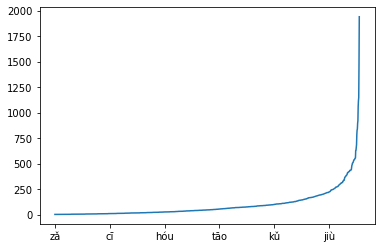

In [90]:
df_py_number_per_word.sort_values().plot()

In [97]:
df_py_number_per_word.quantile(.2)

10.0